In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.io import arff
import os

## Data Extraction ##

In [2]:
# Search for arff files
path_to_directory="./Dataset/"
files = [arff for arff in os.listdir(path_to_directory) if arff.endswith(".arff")]

In [3]:
# function to convert arff file to list of lines
def toCsv(content): 
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for zzzz,file in enumerate(files):
    with open(path_to_directory+file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open("csv_result-"+name+".csv", "w") as outFile:
            outFile.writelines(new)

## Data Merging ##

In [11]:
df_pc3 = pd.read_csv('./Dataset/csv_result-PC3.csv')
df_pc4 = pd.read_csv('./Dataset/csv_result-PC4.csv')
df_mc1 = pd.read_csv('./Dataset/csv_result-MC1.csv')

In [12]:
# null Values check
df_mc1.isnull().sum()

id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
GLOBAL_DATA_COMPLEXITY             0
GLOBAL_DATA_DENSITY                0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
M

In [13]:
df_pc4.isnull().sum()

id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
M

In [14]:
df_pc3.isnull().sum() 

id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
M

In [15]:
df_pc3.shape

(1077, 39)

In [16]:
df_pc4.shape

(1458, 39)

In [17]:
df_mc1.shape

(1988, 40)

comparing pc4 to mc1, pc4 has decision density but mc1 does not while mc1 has global data complexity and global data density while pc4 does not pc4 columns = pc3 columns except for last column that predicts is named differently also pc3 and pc4 has the same column name for the last column

## Merge PC4 and PC3 ##

In [18]:
df = df_pc3.merge(df_pc4, how = 'outer')

D:\Michigan_Study_Folder\SIADS_591\SIADS_591_592-main\env\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [19]:
# set nans to an empty string
df2 = df[['Defective','c']].fillna('')
df2["defects"] = df2["Defective"].astype('string') + df2["c"].astype('string')
df2 = df2.drop(labels = ['Defective', 'c'], axis = 1)

In [20]:
df['defects'] = df2
df= df.drop(labels = ['Defective', 'c'], axis = 1)

In [21]:
df['defects'] = df['defects'].astype('string')

In [22]:
df['defects'] = df['defects'].str.replace('False', '0')
df['defects'] = df['defects'].str.replace('True', '1')
df['defects'] = df['defects'].str.replace('N', '0')
df['defects'] = df['defects'].str.replace('Y', '1')

In [23]:
df['defects'] = df['defects'].astype('int64')

In [24]:
df.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,defects
0,1,16,13,1,6,11,20,7,0.24,8,...,17,0.12,68,81,31,21,57,42.50,29,0
1,2,2,7,0,0,7,10,4,0.29,4,...,9,0.17,9,22,5,8,24,33.33,14,1
2,3,1,13,5,0,0,22,7,0.37,10,...,23,0.33,38,53,19,19,21,0.00,19,0
3,4,8,3,1,0,1,4,2,0.14,2,...,6,0.08,32,38,19,13,24,6.67,14,0
4,5,1,5,2,1,1,6,3,0.15,2,...,9,0.13,27,33,19,14,23,9.52,20,0


## Now merge mc1 ##

In [25]:
df = df.merge(df_mc1, how = 'outer')

D:\Michigan_Study_Folder\SIADS_591\SIADS_591_592-main\env\lib\site-packages\pandas\core\reshape\merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


In [26]:
df = df.merge(df_mc1, how = 'outer')
# set nans to an empty string
df3 = df[['Defective','defects']].fillna('')
df3["defected"] = df3["Defective"].astype('string') + df3["defects"].astype('string')
df3 = df3.drop(labels = ['Defective', 'defects'], axis = 1)
df['defected'] = df3
df_f = df.drop(['defects','Defective'], axis = 1)
df_f['defected'] = df_f['defected'].astype('string')
df_f['defected'] = df_f['defected'].str.replace('False', '0')
df_f['defected'] = df_f['defected'].str.replace('True', '1')
df_f['defected'] = df_f['defected'].str.replace('N', '0')
df_f['defected'] = df_f['defected'].str.replace('Y', '1')
df_f['defected'] = df_f['defected'].astype('float')

In [27]:
df_f.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,defected
0,1,16,13,1,6,11,20,7,0.24,8,...,68,81,31,21,57,42.50,29,NaN,NaN,0.0
1,2,2,7,0,0,7,10,4,0.29,4,...,9,22,5,8,24,33.33,14,NaN,NaN,1.0
2,3,1,13,5,0,0,22,7,0.37,10,...,38,53,19,19,21,0.00,19,NaN,NaN,0.0
3,4,8,3,1,0,1,4,2,0.14,2,...,32,38,19,13,24,6.67,14,NaN,NaN,0.0
4,5,1,5,2,1,1,6,3,0.15,2,...,27,33,19,14,23,9.52,20,NaN,NaN,0.0


In [28]:
df_f['defected'].value_counts()

0.0    4165
1.0     358
Name: defected, dtype: int64

C:\Users\jalaj\AppData\Local\Temp/ipykernel_25188/802670761.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

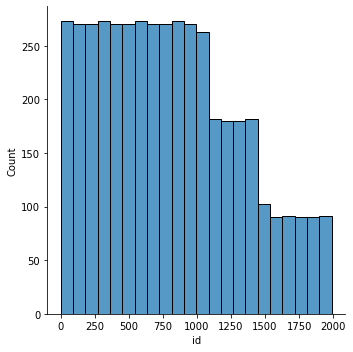

<Figure size 432x288 with 0 Axes>

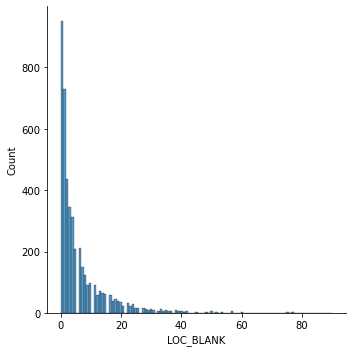

<Figure size 432x288 with 0 Axes>

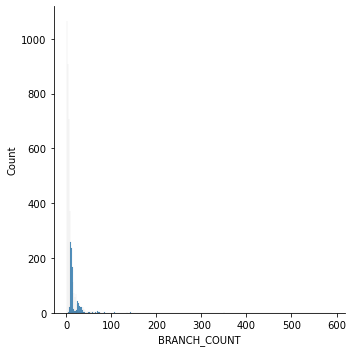

<Figure size 432x288 with 0 Axes>

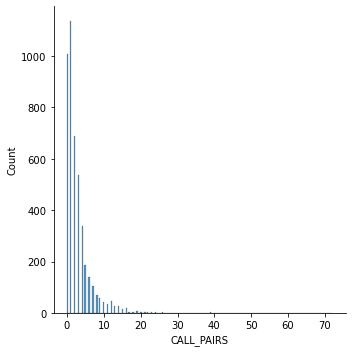

<Figure size 432x288 with 0 Axes>

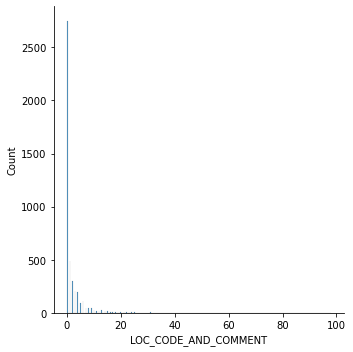

<Figure size 432x288 with 0 Axes>

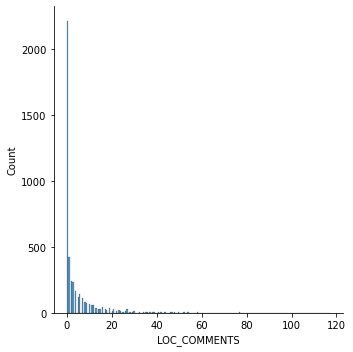

<Figure size 432x288 with 0 Axes>

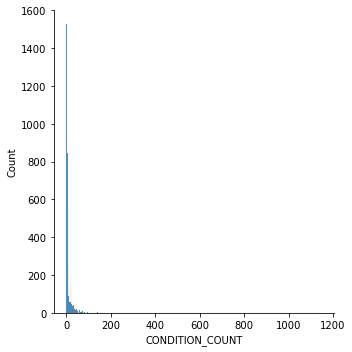

<Figure size 432x288 with 0 Axes>

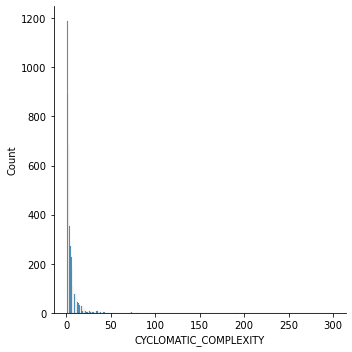

<Figure size 432x288 with 0 Axes>

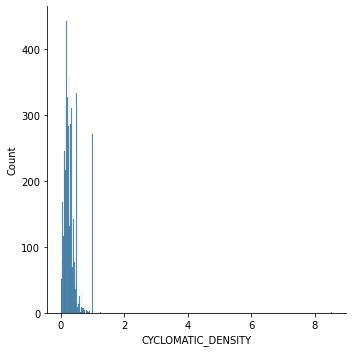

<Figure size 432x288 with 0 Axes>

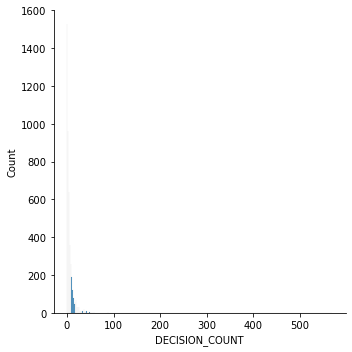

<Figure size 432x288 with 0 Axes>

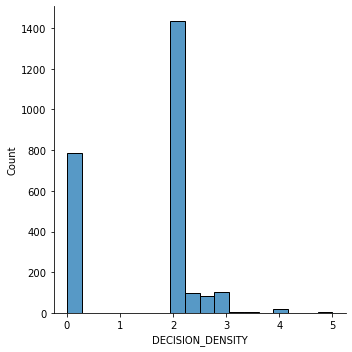

<Figure size 432x288 with 0 Axes>

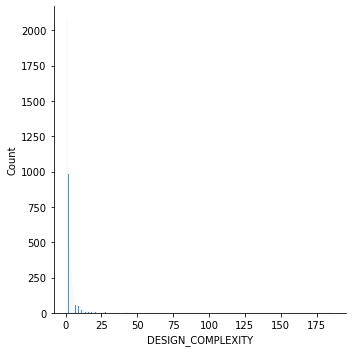

<Figure size 432x288 with 0 Axes>

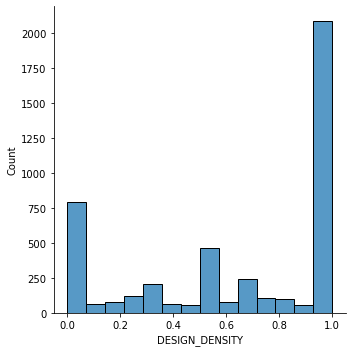

<Figure size 432x288 with 0 Axes>

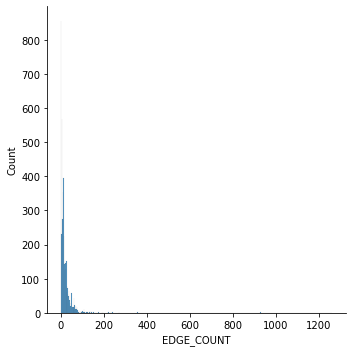

<Figure size 432x288 with 0 Axes>

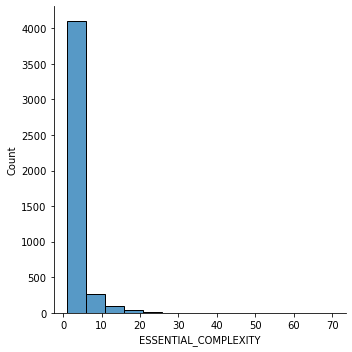

<Figure size 432x288 with 0 Axes>

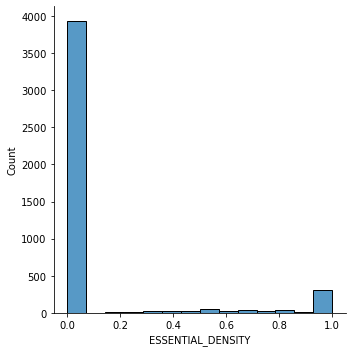

<Figure size 432x288 with 0 Axes>

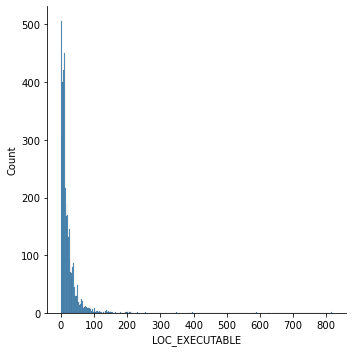

<Figure size 432x288 with 0 Axes>

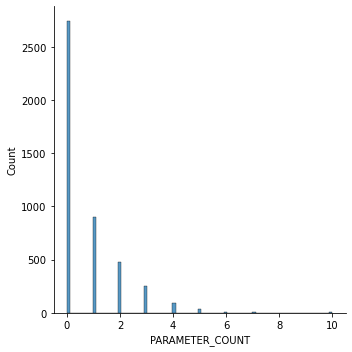

<Figure size 432x288 with 0 Axes>

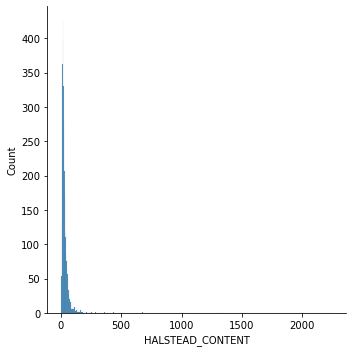

<Figure size 432x288 with 0 Axes>

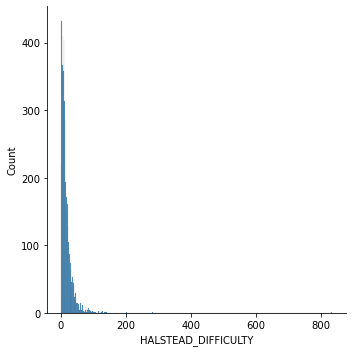

<Figure size 432x288 with 0 Axes>

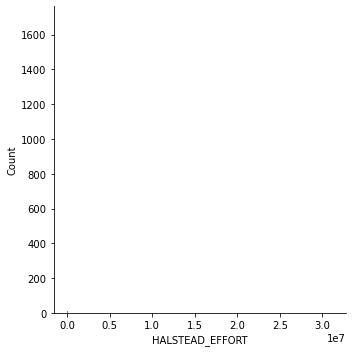

<Figure size 432x288 with 0 Axes>

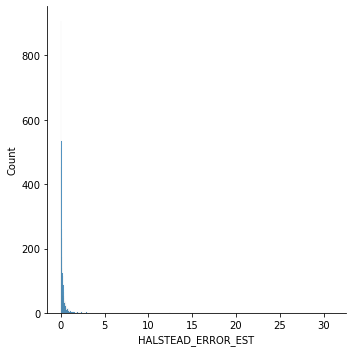

<Figure size 432x288 with 0 Axes>

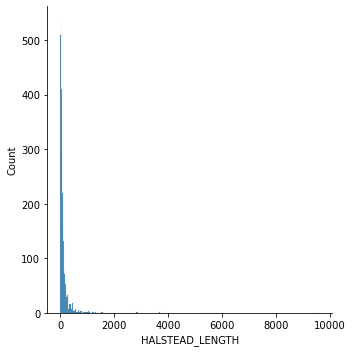

<Figure size 432x288 with 0 Axes>

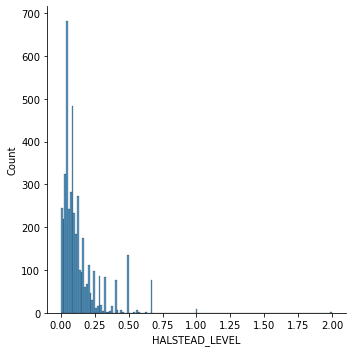

<Figure size 432x288 with 0 Axes>

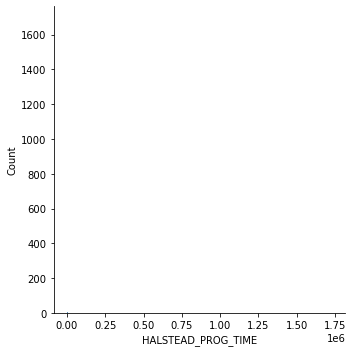

<Figure size 432x288 with 0 Axes>

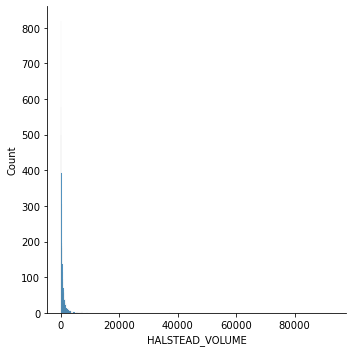

<Figure size 432x288 with 0 Axes>

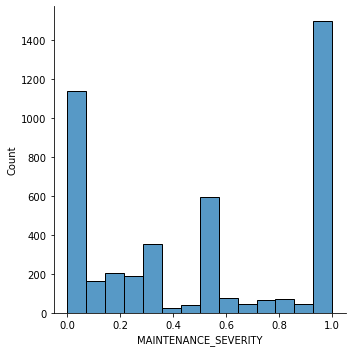

<Figure size 432x288 with 0 Axes>

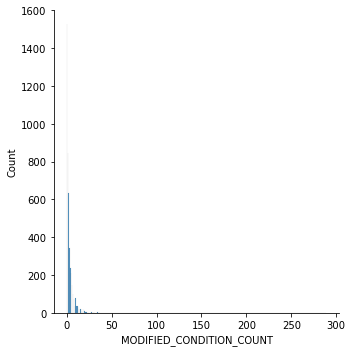

<Figure size 432x288 with 0 Axes>

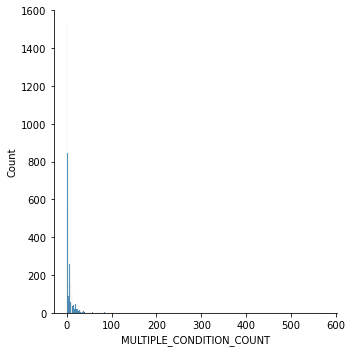

<Figure size 432x288 with 0 Axes>

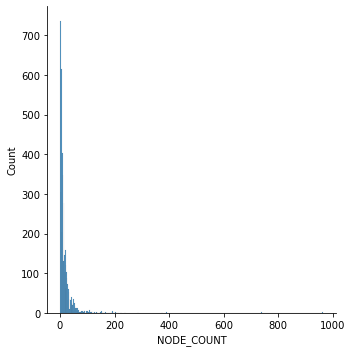

<Figure size 432x288 with 0 Axes>

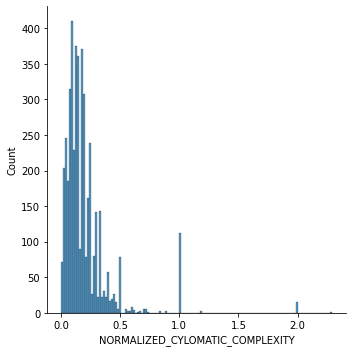

<Figure size 432x288 with 0 Axes>

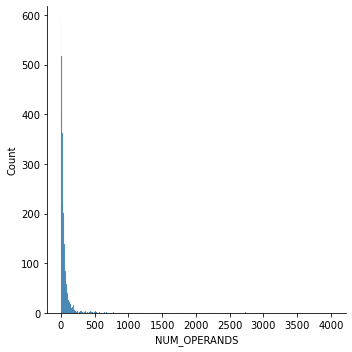

<Figure size 432x288 with 0 Axes>

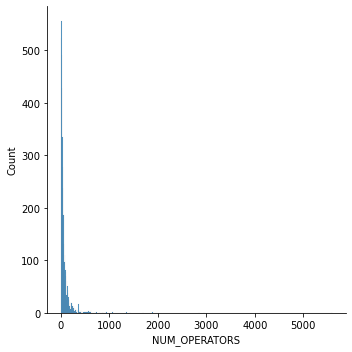

<Figure size 432x288 with 0 Axes>

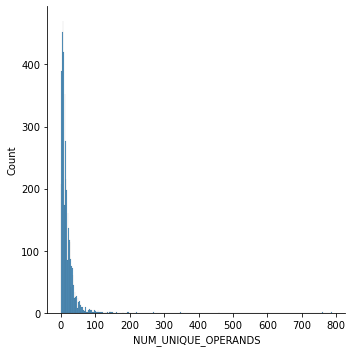

<Figure size 432x288 with 0 Axes>

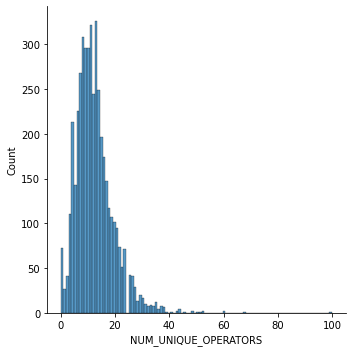

<Figure size 432x288 with 0 Axes>

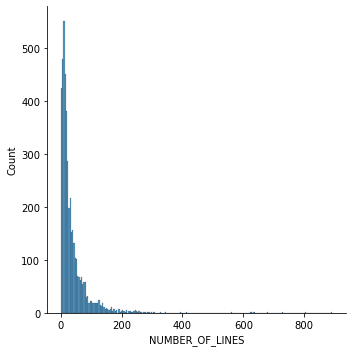

<Figure size 432x288 with 0 Axes>

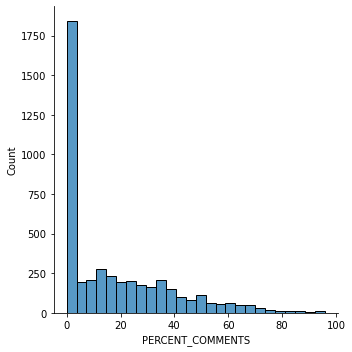

<Figure size 432x288 with 0 Axes>

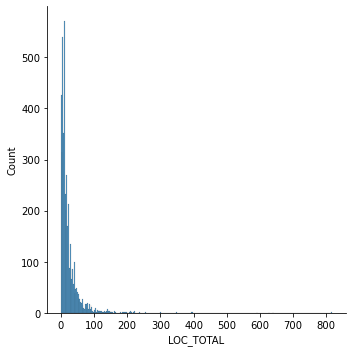

<Figure size 432x288 with 0 Axes>

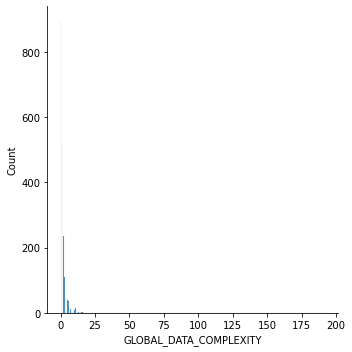

<Figure size 432x288 with 0 Axes>

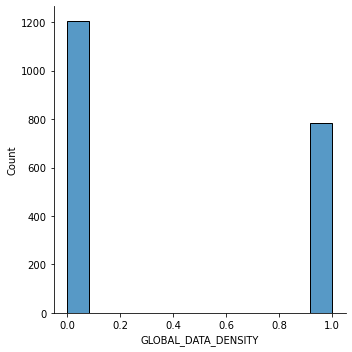

<Figure size 432x288 with 0 Axes>

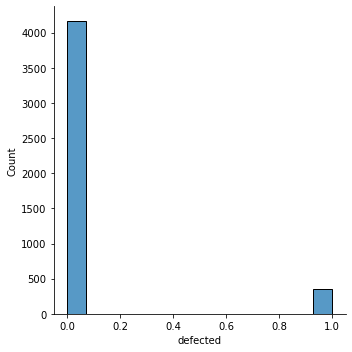

In [29]:
# get some idea about the distributions
for column in df_f.columns:
    plt.figure()             
    sns.displot(df_f[column])

In [31]:
# Ideal Conditions specified by verifysoft
# 1. Number Of Lines < 400
# 2. HALSTEAD_VOLUME(V) < 1000 & >20
# 3. CYCLOMATIC_COMPLEXITY < 15 
# 4. bugs (HALSTEAD_ERROR_EST) < 2

In [35]:
# 5. formula for calculating HALSTEAD_EFFORT(e) : b = e**(2/3)/3000
e = (2*3000)**(3/2)
e

464758.00154489005

In [36]:
# 6. formula for calculating HALSTEAD_PROG_TIME (t) : t = e/18
t = e/18
t

25819.888974716116

In [37]:
# 7. formula for calculating HALSTEAD_DIFFICULTY (d) : e = v*d
e/1000

464.7580015448901

In [38]:
e/20

23237.900077244503

In [39]:
columns_ideal = ['LOC_TOTAL', 'HALSTEAD_VOLUME', 'CYCLOMATIC_COMPLEXITY', 'HALSTEAD_ERROR_EST', 'HALSTEAD_EFFORT', 
                  'HALSTEAD_PROG_TIME', 'HALSTEAD_DIFFICULTY', 'defected']

In [40]:
df_ideal = df_f[columns_ideal].copy()

In [42]:
ideal_condition = (df_ideal['LOC_TOTAL'] < 400) & (df_ideal['HALSTEAD_VOLUME'] < 1000) & (df_ideal['HALSTEAD_VOLUME'] > 20) & (df_ideal['CYCLOMATIC_COMPLEXITY'] < 15) & (df_ideal['HALSTEAD_ERROR_EST'] < 2) & (df_ideal['HALSTEAD_EFFORT'] < 464758.0) & (df_ideal['HALSTEAD_PROG_TIME'] < 25820) & (df_ideal['HALSTEAD_DIFFICULTY'] < 23237.9)

In [44]:
df_ideal['REDESIGN_STATUS'] = pd.DataFrame(ideal_condition)

In [45]:
# 0 if no changes
# 1 is Redsign needed
df_ideal['REDESIGN_STATUS'] = [0 if evaluation == True else 1 for evaluation in df_ideal['REDESIGN_STATUS']]

In [46]:
df_ideal.head()

,LOC_TOTAL,HALSTEAD_VOLUME,CYCLOMATIC_COMPLEXITY,HALSTEAD_ERROR_EST,HALSTEAD_EFFORT,HALSTEAD_PROG_TIME,HALSTEAD_DIFFICULTY,defected,REDESIGN_STATUS
0,29,849.37,7,0.28,19562.81,1086.82,23.03,0.0,0
1,14,114.71,4,0.04,825.94,45.89,7.20,1.0,0
2,19,477.56,7,0.16,9073.67,504.09,19.00,0.0,0
3,14,350.00,2,0.12,3831.58,212.87,10.95,0.0,0
4,20,302.66,3,0.10,3010.71,167.26,9.95,0.0,0


In [48]:
df_ideal[['defected', 'REDESIGN_STATUS']]

,defected,REDESIGN_STATUS
0,0.0,0
1,1.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
4518,0.0,0
4519,0.0,1
4520,0.0,0
4521,0.0,1


In [49]:
df_ideal['defected'].value_counts()

0.0    4165
1.0     358
Name: defected, dtype: int64

In [50]:
df_ideal['REDESIGN_STATUS'].value_counts()

0    3475
1    1048
Name: REDESIGN_STATUS, dtype: int64